In [28]:
"""Derivatives."""

'Derivatives.'

In [ ]:
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
from sympy import diff
from sympy.abc import w as w_coeff

In [30]:
print(np.__version__)

2.0.1


In [31]:
func = (2 - w_coeff) ** 2

diff(func, w_coeff)

2*w - 4

In [ ]:
# Optimization of a function and finding the minimum


def objective(
    x_val: Union[
        float,
        Union[float, NDArray[np.float64]],
    ],
) -> Union[
    float,
    Union[float, NDArray[np.float64]],
]:
    """Calculate quadratic function (x-2)^2."""
    return (x_val - 2) ** 2


def derivative(
    x_val: Union[
        float,
        Union[float, NDArray[np.float64]],
    ],
) -> Union[
    float,
    Union[float, NDArray[np.float64]],
]:
    """Calculate derivative of quadratic function."""
    return 2 * x_val - 4


w_coeff_val: float = -3
itr: int = 100
lr: float = 0.05

l_list: list[float] = []
w_list: list[float] = []
d_list: list[float] = []

print(f"Initial weight: {w_coeff_val}")
for i in range(itr):
    w_list.append(w_coeff_val)
    l_list.append(float(objective(w_coeff_val)))
    d_list.append(float(derivative(w_coeff_val)))
    # but most importantly, we will update the weights in the direction
    # opposite to the direction of the derivative multiplied by the learning
    # rate
    w_coeff_val = w_coeff_val - lr * float(derivative(w_coeff_val))
print(f"Final weight: {w_coeff_val}")
print(objective(w_coeff_val), derivative(w_coeff_val))
print(w_list[:3])
print(l_list[:3])
print(d_list[:3])

Initial weight: -3
Final weight: 1.999867193005562
1.76376977716448e-08 -0.00026561398887592347
[-3, -2.5, -2.05]
[25.0, 20.25, 16.4025]
[-10.0, -9.0, -8.1]


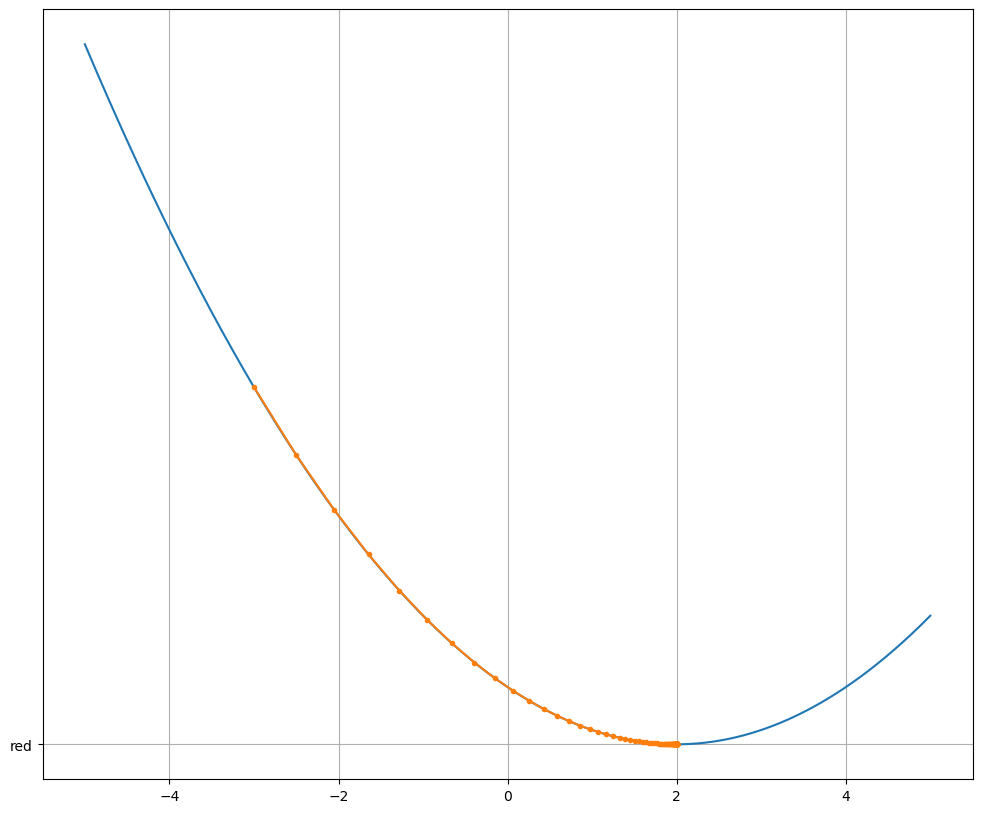

In [33]:
def draw_min_plot() -> None:
    """Draw plot showing objective function and optimization path."""
    plt.figure(figsize=(12, 10))
    x_points = np.linspace(-5, 5, 5000, dtype=np.float64)
    y_results = objective(x_points)
    plt.plot(x_points, y_results)

    plt.plot(w_list, l_list, ".-", "red")
    plt.grid()

    plt.show()


draw_min_plot()

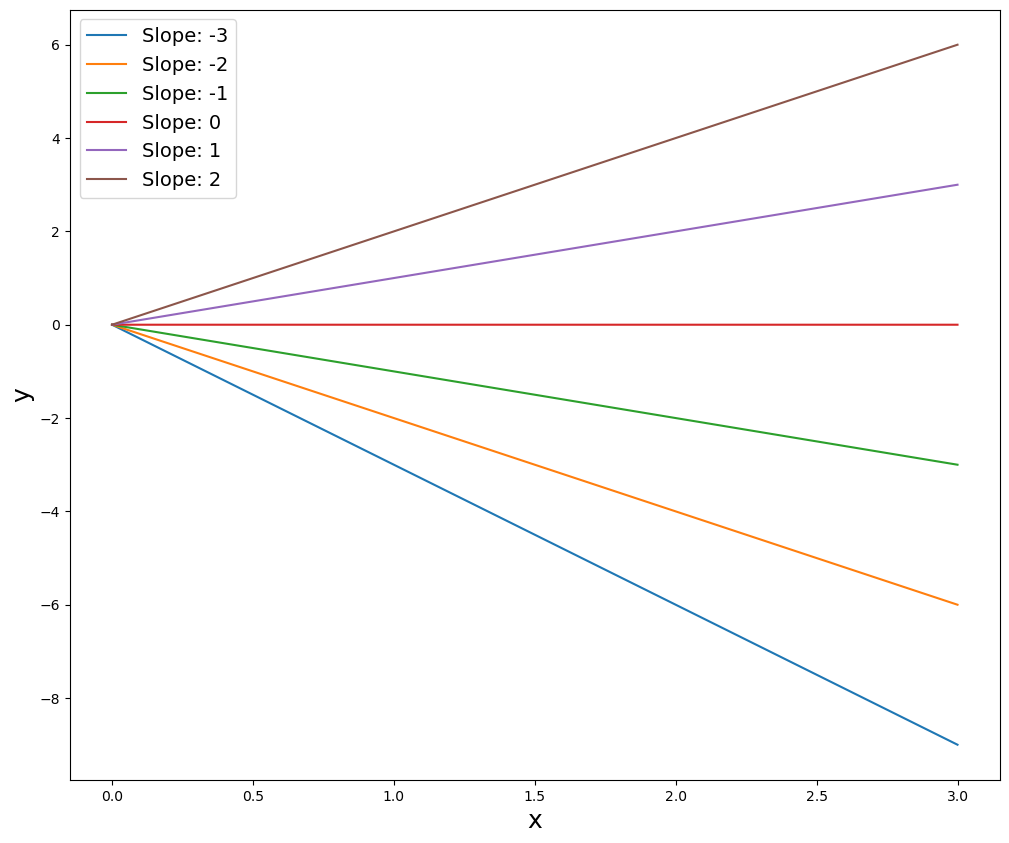

In [34]:
def draw_slopes() -> None:
    """Draw multiple lines with dif slopes to visualize gradient concept."""
    plt.figure(figsize=(12, 10))
    for w_val in range(-3, 3):
        x_points = np.linspace(0, 3, 5000)
        y_results = w_val * x_points  # simplified model without intercept(b0)
        plt.plot(x_points, y_results, label=f"Slope: {w_val}")

    plt.xlabel("x", fontsize=18)
    plt.ylabel("y", fontsize=18)
    plt.legend(loc="upper left", prop={"size": 14})
    plt.show()


draw_slopes()

- вначале у нас есть модель, которую мы хотим оптимизировать, у нее есть данные (признаки), веса этих признаков и результат (например, цена дома в задаче линейной регрессии);
- для оптимизации исходной модели (то есть поиска идеальных весов) мы берем вторую функцию, функцию потерь, которая на входе принимает разные варианты этих весов, а на выходе показывает насколько, при таких весах, мы отклонились от идеального описания исходных данных;
- идеальные веса находятся там, где функция потерь выдает минимальное значение («дно» параболы, например);
- зная значения производной от функции потерь в конкретной точке, мы можем спускаться в обратном ей направлении до тех пор, пока не дойдем до минимума;
- коэффициент скорости обучения, на который мы умножаем значение производной, позволяет регулировать длину шага при каждой итерации алгоритма.


`lr` - is hyper parameters and configure before learning_curve